In [1]:
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile, join

## Convert Frames into Video ...

In [83]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
    #for sorting the file names properly
    files = sorted_alphanumeric(files)
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        img = cv2.resize(img,(600,600))
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)

    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

def main():
    pathIn= '/home/mononoke/Desktop/Dataset/all_images/1/'
    pathIn = 'Images/CarImages/'
    pathOut = 'video1.avi'
    fps = 1.0
    convert_frames_to_video(pathIn, pathOut, fps)

if __name__=="__main__":
    main()

['1.jpeg', '2.jpeg', '3.jpeg']
Images/CarImages/1.jpeg
Images/CarImages/2.jpeg
Images/CarImages/3.jpeg


**The 3 pictures given to me was not so good for making a complete so I chose my own video ..**

### Motion Analysis..  (Opens WebCam)
It is during a video that it detects motion of the object that is moving ... It would open your camera and then if you move that would be in white color...

In [48]:
# importing libraries
import numpy as np
import cv2

# creating object
fgbg2 = cv2.createBackgroundSubtractorMOG2();

# capture frames from a camera
cap = cv2.VideoCapture(0);
while(1):
	# read frames
	ret, img = cap.read();
	
	# apply mask for background subtraction
	fgmask2 = fgbg2.apply(img);
	
	cv2.imshow('Original', img);
	cv2.imshow('MOG2', fgmask2);
	if cv2.waitKey(1) & 0xFF == ord('q'): break


cap.release();
cv2.destroyAllWindows();


In [4]:
# Now we will make only some pixels appear and other are made white
# importing libraries
import numpy as np
import cv2

# creating object
fgbg2 = cv2.createBackgroundSubtractorKNN();

# capture frames from a camera
cap = cv2.VideoCapture(0);
while(1):
	# read frames
	ret, img = cap.read();
	
	# apply mask for background subtraction
	fgmask2 = fgbg2.apply(img);
	
	cv2.imshow('Original', img);
	cv2.imshow('MOG2', fgmask2);
	if cv2.waitKey(1) & 0xFF == ord('q'): break
        
cap.release();
cv2.destroyAllWindows();

### Image segmentation 

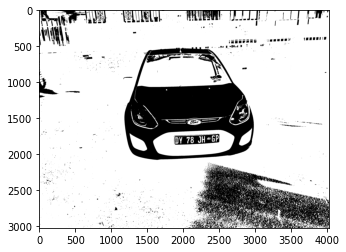

In [88]:
## WaterShed Algorithm.. (Image segmentation..)
img = cv2.imread("Images/CarImages/1.jpeg",0)
width,height = img.shape
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,"gray")
## All the black area is of use..

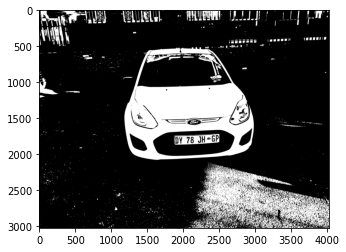

In [95]:
mask = cv2.inRange(thresh,0,50) # applying the inrange formula for image.
plt.imshow(mask,"gray")

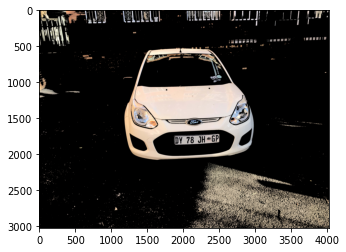

In [97]:
bgr = cv2.cvtColor(cv2.imread("Images/CarImages/1.jpeg"),cv2.COLOR_BGR2RGB)
masked_image = np.copy(bgr)
masked_image[thresh!=0] = [0,0,0] # keeping the car and turning other into black..
plt.imshow(masked_image)

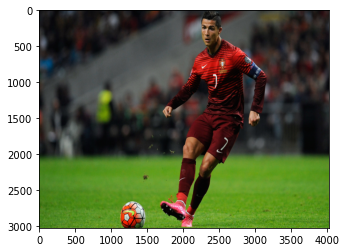

In [98]:
# Mask and add background Image..
background_image = cv2.imread('Images/background.jpg')
background_image =  cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
background_image_resize = cv2.resize(background_image,(height,width))
plt.imshow(background_image_resize)


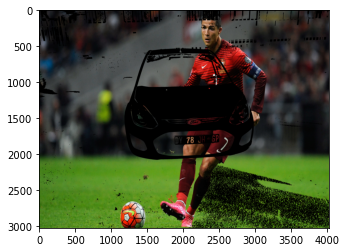

In [99]:
# Now add the mask image over background Image..
background_image_resize[thresh == 0] = [0,0,0]
plt.imshow(background_image_resize)

In [11]:
## Final Image

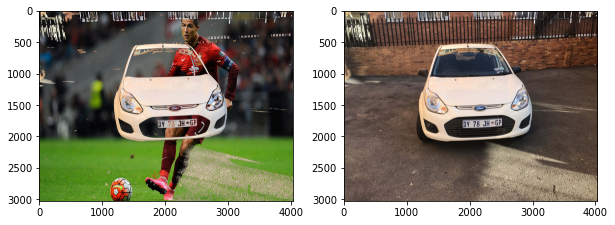

In [100]:
complete_image = masked_image + background_image_resize
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(complete_image)
fig.add_subplot(1, 2, 2)
plt.imshow(bgr)
plt.show()

# Second Method

In [13]:
# K Means Clustering Algorithm..
image = bgr
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
pixel_values = image.reshape((-1,3))
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(12192768, 3)


In [14]:
k = 7
_,labels ,(centers) = cv2.kmeans(pixel_values,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

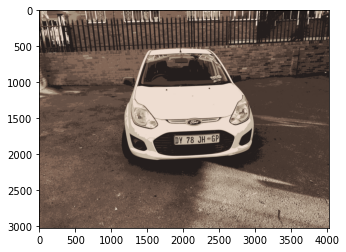

In [15]:
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)

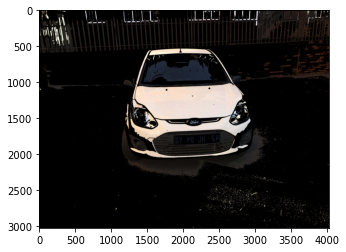

In [37]:
masked_image = np.copy(image)
masked_image = masked_image.reshape((-1,3))
cluster = 0
masked_image[labels==cluster] = [0,0,0]
# cluster = 1
# masked_image[labels==cluster] = [0,0,0]
cluster = 2
masked_image[labels==cluster] = [0,0,0]
cluster = 3
masked_image[labels==cluster] = [0,0,0]
cluster = 4
masked_image[labels==cluster] = [0,0,0]
cluster = 6
masked_image[labels==cluster] = [0,0,0]


masked_image = masked_image.reshape(image.shape)
plt.imshow(masked_image)

In [17]:
# as K means have a label on each pixel now to which cluster it belongs .

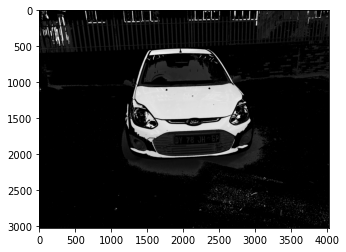

In [38]:
mask = cv2.cvtColor(masked_image,cv2.COLOR_BGR2GRAY)
plt.imshow(mask,"gray")

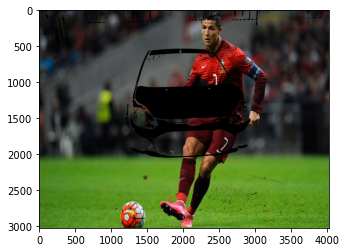

In [45]:
# now put this masked image on top of a background..
background_image = cv2.imread('Images/background.jpg')
background_image =  cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
background_image_resize = cv2.resize(background_image,(height,width))
background_image_resize[mask>110] = [0,0,0]
plt.imshow(background_image_resize)

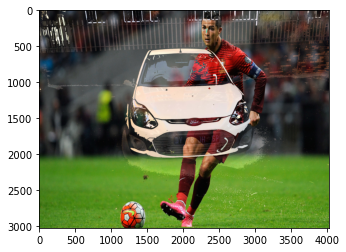

In [46]:
final = background_image_resize + masked_image
plt.imshow(final)

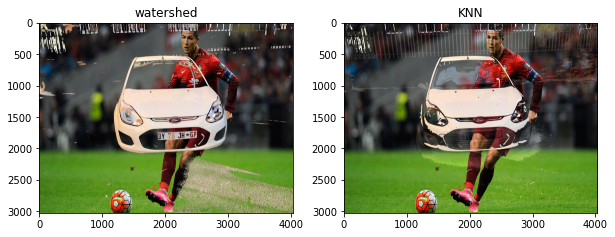

In [47]:
# complete_image = masked_image + background_image_resize
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(complete_image)
plt.title("watershed")
fig.add_subplot(1, 2, 2)
plt.imshow(final)
plt.title("KNN")
plt.show()